# Evolução do mercado de alojamentos familiares, tendo 2015 como ano de referência 


## Evolução do valor das transações de alojamentos familiares, tendo 2015 como ano de referência 

* Variável: Transações (Taxa de variação (numero)) de alojamentos familiares por Localização geográfica (NUTS - 2024), Anual
* [Dados](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0014347&contexto=bd&selTab=tab2)
* [Metainformação](https://www.ine.pt/bddXplorer/htdocs/minfo.jsp?var_cd=0014347&lingua=PT)

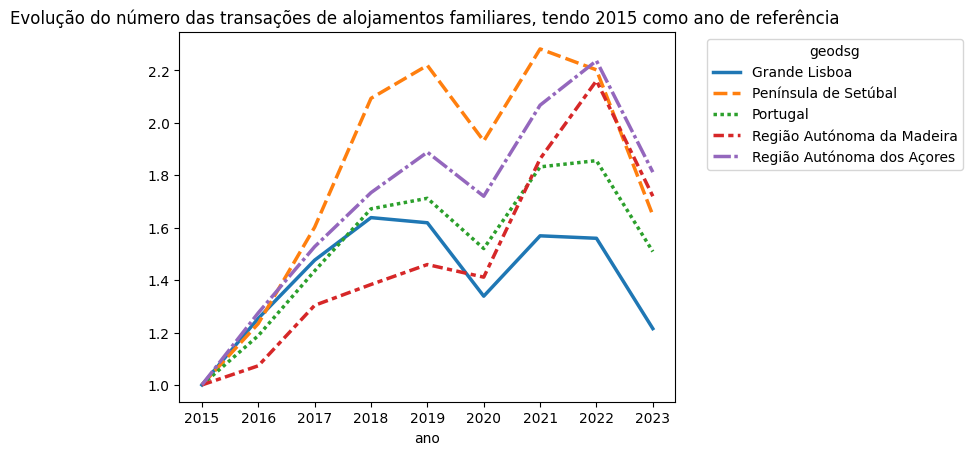

In [14]:
from ine_api import get_df, default_plot

anos = ",".join([f"S7A{ano}" for ano in range(2015, 2024)])
params_base = {
    "lang": "PT",
    "Dim1": anos,
    "Dim3": "H1",
    "Dim4": "T",
    "Dim5": "T",
}
# Transactions (Annual rate of change (number)
params_trans = {**params_base, "varcd": "0014347"}
df_num = get_df(params_trans)
df_num["valor_scaled"] = df_num["valor"].transform(lambda x: (1 + x / 100))
df_num.loc[df_num["ano"] == "2015", "valor_scaled"] = 1
df_num["valor"] = df_num.groupby("geocod")["valor_scaled"].cumprod()
default_plot(
    df=df_num[df_num["geocod"].isin(["PT", "1A", "1B", "2", "3"])],
    title="Evolução do número das transações de alojamentos familiares, tendo 2015 como ano de referência ",
)

## Evolução do valor das transações de alojamentos familiares, tendo 2015 como ano de referência
* Variável: Transações (Taxa de variação (valor)) de alojamentos familiares por Localização geográfica (NUTS - 2024), Anual
* [Dados](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0014348&contexto=bd&selTab=tab2)
* [Metainformação](https://www.ine.pt/bddXplorer/htdocs/minfo.jsp?var_cd=0014348&lingua=PT)

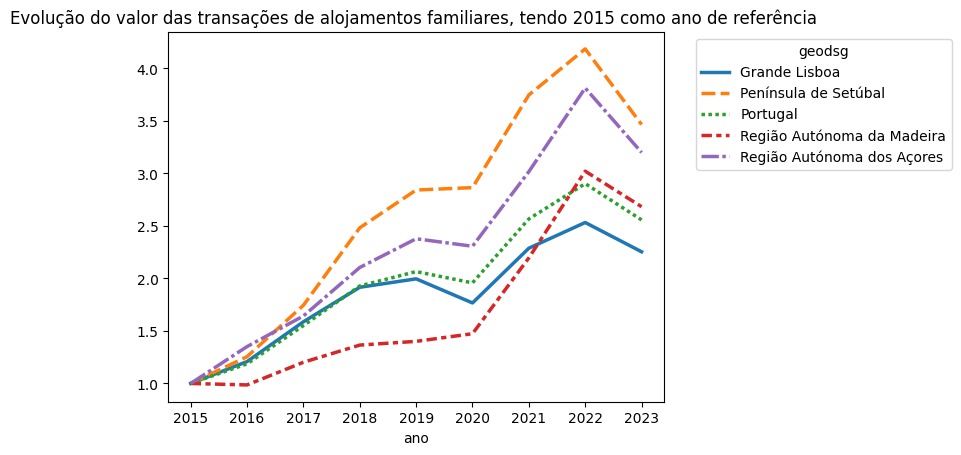

In [15]:
from ine_api import get_df, default_plot

anos = ",".join([f"S7A{ano}" for ano in range(2015, 2024)])
params_base = {
    "lang": "PT",
    "Dim1": anos,
    "Dim3": "H1",
    "Dim4": "T",
    "Dim5": "T",
}
params_trans = {**params_base, "varcd": "0014348"}
df_valor = get_df(params_trans)
df_valor["valor_scaled"] = df_valor["valor"].transform(lambda x: (1 + x / 100))
df_valor.loc[df_valor["ano"] == "2015", "valor_scaled"] = 1
df_valor["valor"] = df_valor.groupby("geocod")["valor_scaled"].cumprod()
default_plot(
    df=df_valor[df_valor["geocod"].isin(["PT", "1A", "1B", "2", "3"])],
    title="Evolução do valor das transações de alojamentos familiares, tendo 2015 como ano de referência ",
)

## Evolução do valor médio das transações de alojamentos familiares, tendo 2015 como ano de referência

(É questão de dividir um rácio pelo outro)

In [16]:
df_valor.set_index(["geocod", "ano"], inplace=True)
df_num.set_index(["geocod", "ano"], inplace=True)

df_ratio = df_valor.join(df_num, lsuffix="_money", rsuffix="_num")

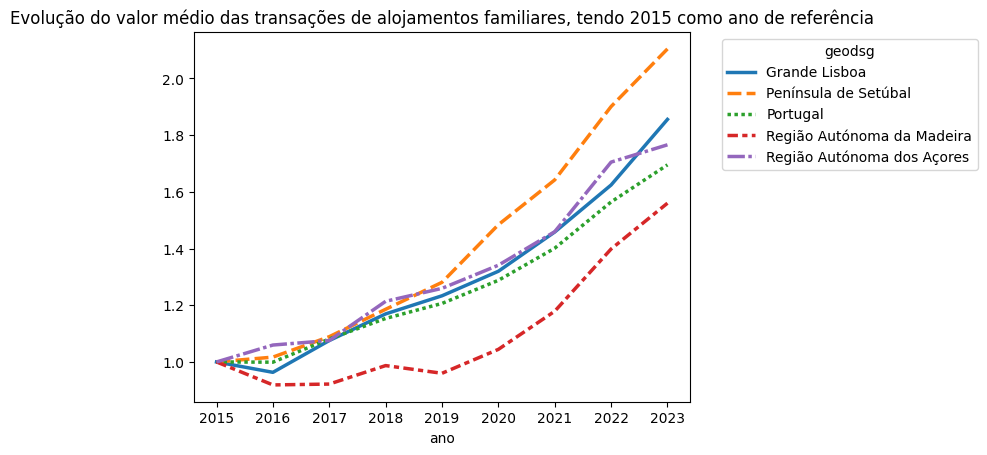

In [ ]:
# default_plot works with columns named 'valor', 'ano' and 'geodsg' hence the following manipulations
df_ratio["valor"] = df_ratio["valor_money"] / df_ratio["valor_num"]
df_ratio["ano"] = df_ratio.index.get_level_values("ano")
df_ratio["geodsg"] = df_ratio["geodsg_num"]
default_plot(
    df=df_ratio.loc[
        df_ratio.index.get_level_values("geocod").isin(
            ["PT", "1A", "1B", "2", "3"]
        )
    ],
    title="Evolução do valor médio das transações de alojamentos familiares, tendo 2015 como ano de referência",
)